## 문제 정의
- 버섯의 특성읠 활용해 독/식용 버섯을 분류
- Decision tree 시각화 & 과대적합 하이퍼퍼라미터 조정
- 특성선택(Feature selection) 해보기

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('data/mushroom.csv')
data.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## 문제와 답 나누기

In [6]:
X = data.iloc[: , 1:]  [: , 'cap-shape':]
y = data.iloc[: , 0]   [: , 'poisonous']

In [15]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


In [7]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [8]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [9]:
y.value_counts()  #시리즈적용

e    4208
p    3916
Name: poisonous, dtype: int64

## 인코딩

### One_hot Encoding (원 핫 인코딩)
- 0 또는 1의 값을 가진 여러 개의 새로운 특성으로 변경하는 작업

In [12]:
X_o_h = pd.get_dummies(X)

### Label Encoding (라벨 인코딩)
- 단순 수치 값으로 Mapping하는 작업

In [14]:
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [15]:
# 딕셔너리 형태로
h_dic = {
    'u' : 1, 
    'g' : 2, 
    'm' : 3, 
    'd' : 4, 
    'p' : 5, 
    'w' : 6, 
    'l' : 7
}

In [17]:
X['habitat'].map(h_dic).unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [ ]:
나머지 21개도 이렇게 하나씩 해주면 됨 ......디게 번거롭네ㅎㅎㅎ 

In [ ]:
원 핫 인코딩을 사용해서 X , y 데이터 문제와 답(7:3)으로 분류
기존에는 X -> 지금은 원 핫 인코딩한 X_o_h 로!! 

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_o_h,
                                                y,
                                            test_size = 0.3)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5686, 117)
(2438, 117)
(5686,)
(2438,)


## 모델링
- 시각화 가능!!! 

In [20]:
tree_model = DecisionTreeClassifier()

In [21]:
# 훈련
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# 평가
tree_model.score(X_test, y_test)

1.0

### 시각화 패키지 설치

In [23]:
! pip install graphviz

In [24]:
import graphviz

In [25]:
from sklearn.tree import export_graphviz

In [26]:
X_o_h -> 특성(컬럼)

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [27]:
X_o_h.columns -> 컬럼이름만 빼오기

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [37]:
#export_graphviz(학습시킨 모델명, out_file = '어떤 파일로 내보내질지 이름 결정',
#                class_names = 답 이름 설정해주는 부분,
#                feature_names(특성)= 컬럼명!!,
#                filled = True(색상추가))
export_graphviz(tree_model, out_file = 'tree.dot',
               class_names = ['독버섯', '식용버섯'],
               feature_names = X_o_h.columns,
               filled = True)

In [ ]:
graphviz 라이브러리를 사용해서 위에서 만든 'tree.dot' 파일 읽어오기

In [38]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

In [39]:
with open('./tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()

In [ ]:
아래까지 1차 실행시 오류남 
오류 내용 
failed to execute WindowsPath('dot'),
make sure the Graphviz executables are on your systems' PATH

오류에 PATH 가 있는경우 대부분 경로 문제임

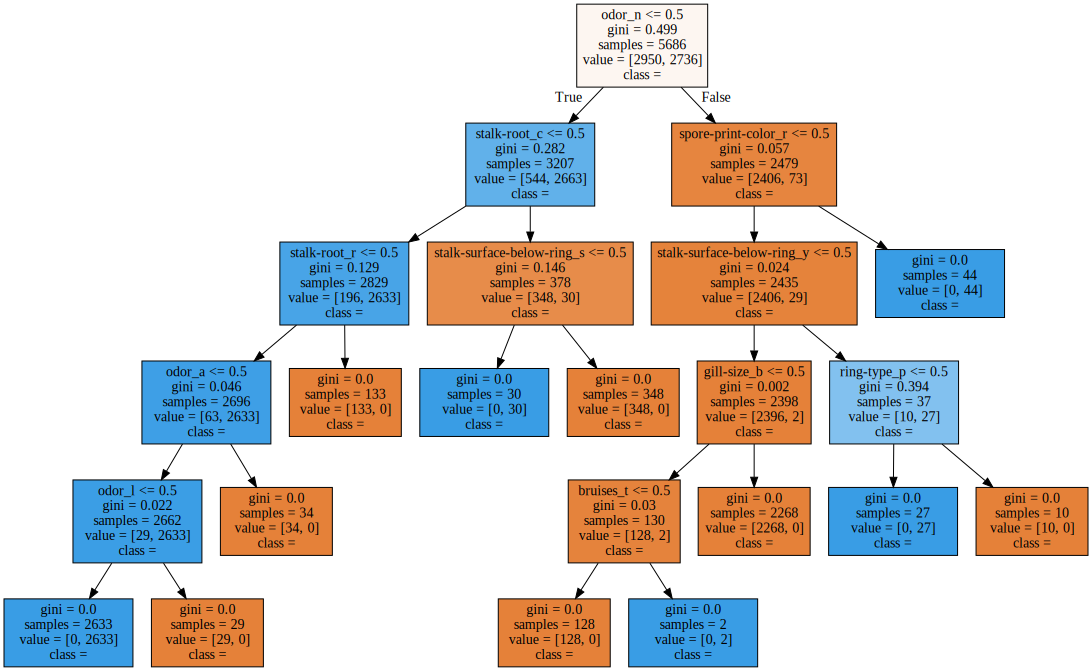

In [40]:
display(graphviz.Source(dot_graph))

### 특성선택 
- tree 모델의 특성중요도

In [41]:
# X_o_h  컬럼 117개  즉, 중요도도 117개
fi = tree_model.feature_importances_
fi

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.38728394e-03, 2.31377670e-02, 0.00000000e+00,
       0.00000000e+00, 2.02073588e-02, 0.00000000e+00, 6.31858269e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.05011988e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.70260284e-01, 0.00000000e+00, 8.51665922e-02,
      

In [42]:
# 내림차순 정렬   odor_n 가장 중요 -> 그래서 위에 표에서도 가장 먼저 분류
# 중요도가 0인 애들은 필요 없으니까 삭제 하는게 좋음
i_df = pd.DataFrame(fi, index = X_o_h.columns)
i_df.sort_values(by = 0, ascending = False)

,0
odor_n,0.631858
stalk-root_c,0.170260
stalk-root_r,0.085167
spore-print-color_r,0.029726
odor_a,0.023138
...,...
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000
gill-spacing_w,0.000000
